In [1]:
import pandas as pd
import numpy as np 

In [2]:
df=pd.read_csv('monthly_milk_production.csv')

In [3]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
df.shape

(168, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
import datetime as dt
df['Month']=df['Date'].dt.month

In [8]:
df['Year']=df['Date'].dt.year

In [9]:
data=df[['Year','Month','Production']]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scale=MinMaxScaler()

In [12]:
data_transformed=scale.fit_transform(data)

In [13]:
def create_sequences(data,window,future):
    X,y=[],[]
    
    for i in range(len(data_transformed)-window-future+1):
        X.append(data_transformed[i:i+window])
        y.append(data_transformed[i+window:i+window+future,2])
    return np.array(X),np.array(y)

In [14]:
X,y=create_sequences(data_transformed,12,12)

In [15]:
# split critera
split=int(len(X)*0.8)

In [16]:
X_train,X_test=X[:split],X[split:]

In [17]:
y_train,y_test=y[:split],y[split:]

In [18]:
input_shape=X.shape[1:]
future=12  # for predicting 12 future production

In [19]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,add,SimpleRNN,LSTM,GRU

In [20]:
rnn_model=Sequential()

In [21]:
def rnn_model(input_shape):
    rnn_model=Sequential()
    rnn_model.add(SimpleRNN(64,activation='tanh',return_sequences=False,input_shape=input_shape))
    rnn_model.add(Dense(future))
    rnn_model.compile(optimizer='adam',loss='mse')
    return rnn_model

In [22]:
def lstm_model(input_shape):
    lstm_model=Sequential()
    lstm_model.add(LSTM(64,activation='tanh',return_sequences=False,input_shape=input_shape))
    lstm_model.add(Dense(future))
    lstm_model.compile(optimizer='adam',loss='mse')
    return lstm_model

In [23]:
def gru_model(input_shape):
    gru_model=Sequential()
    gru_model.add(GRU(64,activation='tanh',return_sequences=False,input_shape=input_shape))
    gru_model.add(Dense(future))
    gru_model.compile(optimizer='adam',loss='mse')
    return gru_model

In [24]:
rnn_model = rnn_model(input_shape)
lstm_model = lstm_model(input_shape)
gru_model = gru_model(input_shape)

In [25]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=3,verbose=1)

In [26]:
print("Training RNN...")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1,callbacks=early_stopping)

Training RNN...
Epoch 1/50

7/7 [==============================] - 3s 102ms/step - loss: 0.3950 - val_loss: 0.4430
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 0.1224 - val_loss: 0.1441
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0458 - val_loss: 0.0591
Epoch 4/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0371 - val_loss: 0.0514
Epoch 5/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0271 - val_loss: 0.0530
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0205 - val_loss: 0.0514
Epoch 7/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0161 - val_loss: 0.0390
Epoch 8/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0130 - val_loss: 0.0268
Epoch 9/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0107 - val_loss: 0.0242
Epoch 10/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0092 - val_loss: 0.0199
Epoch 11/50

In [27]:
print("Training LSTM...")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1,callbacks=early_stopping)

Training LSTM...
Epoch 1/50
7/7 [==============================] - 6s 200ms/step - loss: 0.1931 - val_loss: 0.3386
Epoch 2/50
7/7 [==============================] - 0s 21ms/step - loss: 0.1003 - val_loss: 0.1246
Epoch 3/50
7/7 [==============================] - 0s 23ms/step - loss: 0.0383 - val_loss: 0.0286
Epoch 4/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0292 - val_loss: 0.0376
Epoch 5/50
7/7 [==============================] - 0s 23ms/step - loss: 0.0252 - val_loss: 0.0469
Epoch 6/50
7/7 [==============================] - 0s 22ms/step - loss: 0.0233 - val_loss: 0.0291
Epoch 6: early stopping


In [28]:
print("Training GRU...")
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1,callbacks=early_stopping)

Training GRU...
Epoch 1/50
7/7 [==============================] - 5s 167ms/step - loss: 0.2096 - val_loss: 0.3652
Epoch 2/50
7/7 [==============================] - 0s 23ms/step - loss: 0.1176 - val_loss: 0.1756
Epoch 3/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0512 - val_loss: 0.0446
Epoch 4/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0343 - val_loss: 0.0220
Epoch 5/50
7/7 [==============================] - 0s 23ms/step - loss: 0.0263 - val_loss: 0.0419
Epoch 6/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0247 - val_loss: 0.0396
Epoch 7/50
7/7 [==============================] - 0s 23ms/step - loss: 0.0223 - val_loss: 0.0250
Epoch 7: early stopping


In [29]:
y_pred_rnn=rnn_model.predict(X_test)

1/1 [==============================] - 0s 405ms/step


In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
rnn_mae=round(mean_absolute_error(y_test,y_pred_rnn),2)

In [32]:
y_pred_lstm=lstm_model.predict(X_test)

1/1 [==============================] - 1s 823ms/step


In [33]:
lstm_mae=round(mean_absolute_error(y_test,y_pred_lstm),2)

In [34]:
y_pred_gru=gru_model.predict(X_test)

1/1 [==============================] - 1s 758ms/step


In [35]:
gru_mae=round(mean_absolute_error(y_test,y_pred_gru),2)

In [36]:
from tensorflow.keras.layers import Flatten

In [37]:
y_value=y_test.flatten()
rnn_value=y_pred_rnn.flatten()
lstm_value=y_pred_lstm.flatten()
gru_value=y_pred_gru.flatten()

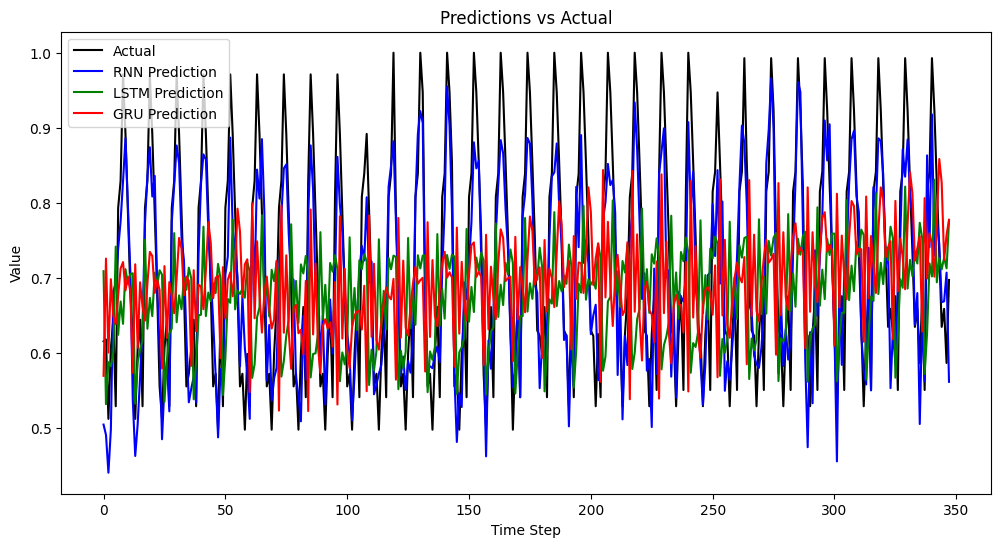

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(y_value, label='Actual', color='black')
plt.plot(rnn_value, label='RNN Prediction', color='blue')
plt.plot(lstm_value, label='LSTM Prediction', color='green')
plt.plot(gru_value, label='GRU Prediction', color='red')

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()


choosing the model with lower peaks

# Prediction

In [39]:
data_dict = {
    'Month': [1,2,3,4,5,6,7,8,9,10,11,12],
    'Year': [2024]*12,
    'Production': [100, 120, 130, 125, 140, 150, 160, 155, 170, 180, 190, 200]
}

df = pd.DataFrame(data_dict)

In [40]:
data_scaled = scale.fit_transform(df[['Month', 'Year', 'Production']].values)

In [41]:
last_sequence = data_scaled[-12:]  

In [42]:
last_sequence=last_sequence.reshape(1,12,3)

In [43]:
output=gru_model.predict(last_sequence)

1/1 [==============================] - 0s 54ms/step


In [44]:
output=output.reshape(-1,1)

In [45]:
dummy=np.zeros((output.shape[0],3))

In [46]:
dummy[:,2]=output[:,0]

In [47]:
original_prediction=scale.inverse_transform(dummy)[:,2]

In [48]:
original_prediction

array([146.69198692, 173.70288968, 154.08977866, 165.82714319,
       149.35453236, 149.54114556, 153.27323675, 154.88772392,
       162.9324615 , 156.61405921, 155.19931316, 155.48458695])

In [49]:
pred_int = np.round(original_prediction).astype(int)
print(pred_int)


[147 174 154 166 149 150 153 155 163 157 155 155]
